In [ ]:
import os
!pip install -q opendatasets
!pip install -q rembg
import opendatasets as od
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import json
from sklearn.metrics import confusion_matrix,classification_report

!pip install onnxruntime rembg pillow




In [ ]:
## Downloading Datasets
if not os.path.exists("./new-plant-diseases-dataset"):
    print("Downloading Dataset")
    od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

In [ ]:
# Rotate, flip, zoom & contrast
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
   # tf.keras.layers.RandomZoom(0.05),
    tf.keras.layers.RandomContrast(0.1),
], name="data_augmentation")


In [ ]:
# preprosess training & validation dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)

In [5]:
# print & save classes
class_names = validation_set.class_names
print(class_names)
with open("class.json", "w") as f:
    json.dump(class_names, f, indent=4)


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

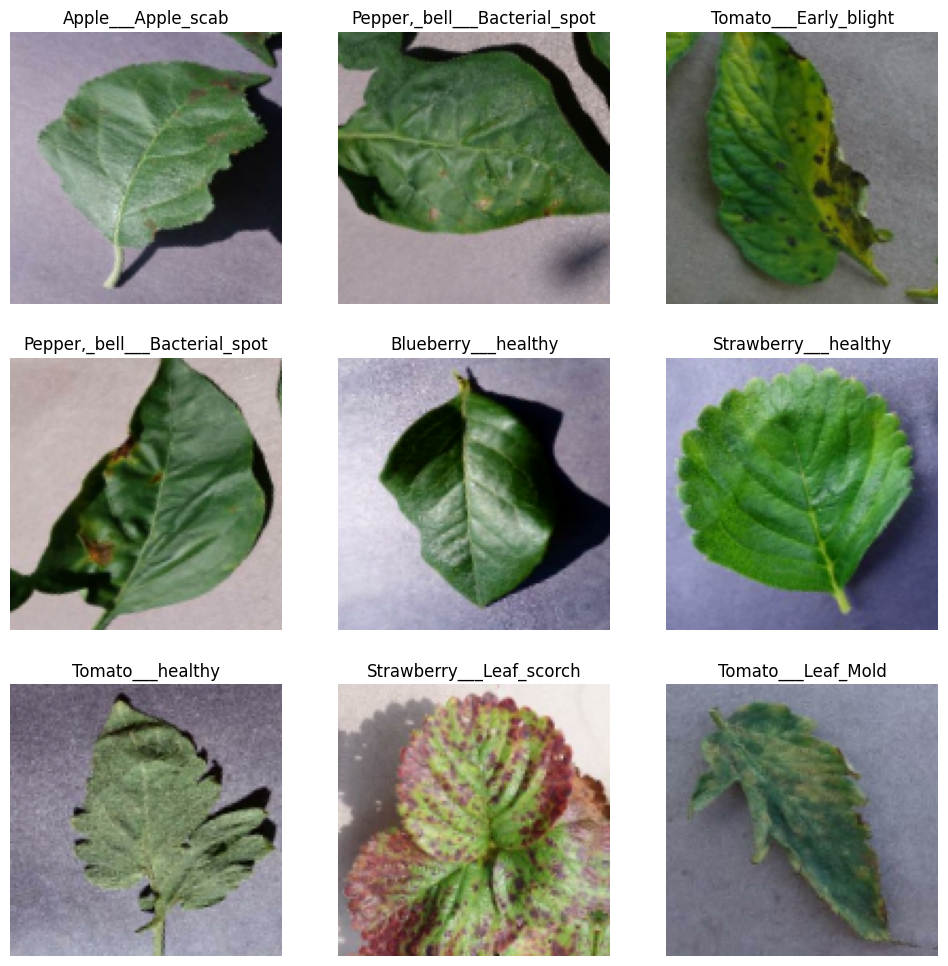

In [ ]:
for images, labels in training_set.take(1):
    plt.figure(figsize=(12, 12))

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(images[i], 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("uint8"))

        label_index = tf.argmax(labels[i]).numpy()
        plt.title(class_names[label_index])
        plt.axis("off")

    plt.show()


## Test model 1

In [ ]:
cnn = tf.keras.Sequential([

    tf.keras.layers.Rescaling(1./255, input_shape=(128,128,3)),

    tf.keras.layers.Conv2D(32, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(32, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(64, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(128, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(256, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(256, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(512, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(512, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(38, activation='softmax')
])

## Test model 2

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1024,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))


## Test model 3

In [ ]:
cnn = tf.keras.models.Sequential()

# Block 1
cnn.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(128,128,3)))
cnn.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2))

# Block 2
cnn.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2))

# Block 3
cnn.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2))

# Block 4
cnn.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(256, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2))


cnn.add(tf.keras.layers.Dropout(0.3))

# Classifier
cnn.add(tf.keras.layers.GlobalAveragePooling2D())
cnn.add(tf.keras.layers.Dense(256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(38, activation='softmax'))

##  Compile

In [ ]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             

 Total params: 5,000,326 (19.07 MB)

 Trainable params: 4,996,358 (19.06 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
# Train model
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 184s 75ms/step - accuracy: 0.6043 - loss: 1.8987 - val_accuracy: 0.8782 - val_loss: 1.0899
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 155s 71ms/step - accuracy: 0.9102 - loss: 1.0342 - val_accuracy: 0.9181 - val_loss: 0.9845
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 155s 71ms/step - accuracy: 0.9542 - loss: 0.9109 - val_accuracy: 0.9712 - val_loss: 0.8272
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 155s 71ms/step - accuracy: 0.9706 - loss: 0.8569 - val_accuracy: 0.9716 - val_loss: 0.8301
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 155s 71ms/step - accuracy: 0.9798 - loss: 0.8244 - val_accuracy: 0.9440 - val_loss: 0.8814
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 154s 70ms/step - accuracy: 0.9864 - loss: 0.7957 - val_accuracy: 0.9555 - val_loss: 0.8877
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 211s 74ms/step - accuracy: 0.9894 - loss: 0.7828 - val_accuracy: 0.9875 - val_loss: 0.7488
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 156s 71ms/step - accuracy: 

### Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc, 'Training loss:', train_loss)

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc, 'Validation loss:', train_loss)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 0.9970 - loss: 0.6924
Training accuracy: 0.9971833229064941 Training loss: 0.6919757723808289
550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9910 - loss: 0.7125
Validation accuracy: 0.9900409579277039 Validation loss: 0.6919757723808289


In [ ]:
# save model
cnn.save('plant_disease_classification_v3.keras')

## Accuracy Visualization

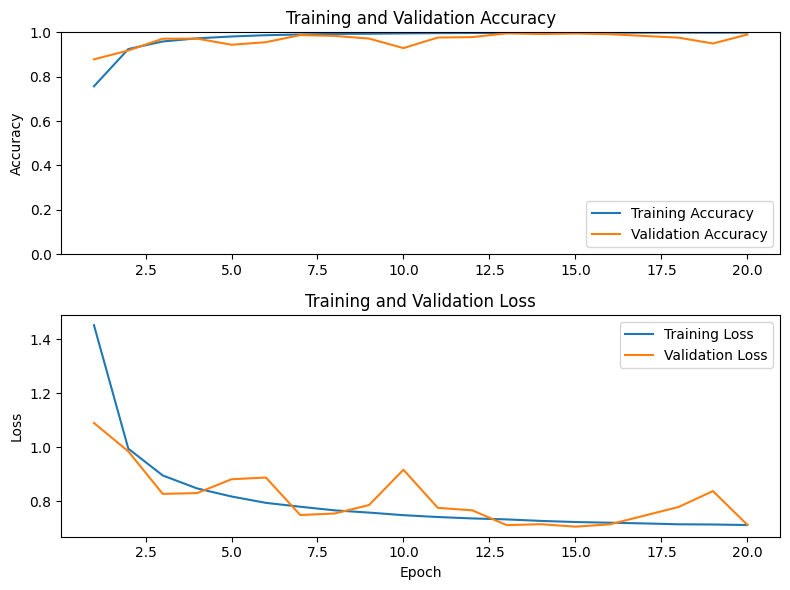

In [ ]:
acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 6))

# Accuracy
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(2, 1, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


## Matrices

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
cm = confusion_matrix(Y_true,predicted_categories)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step


In [ ]:
# Precision Recall F1score
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       0.99      1.00      1.00       440
                                   Apple___healthy       0.99      1.00      1.00       502
                               Blueberry___healthy       1.00      0.99      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       0.99      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.97      0.97       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.98      0.

### Confusion Matrix Visualization

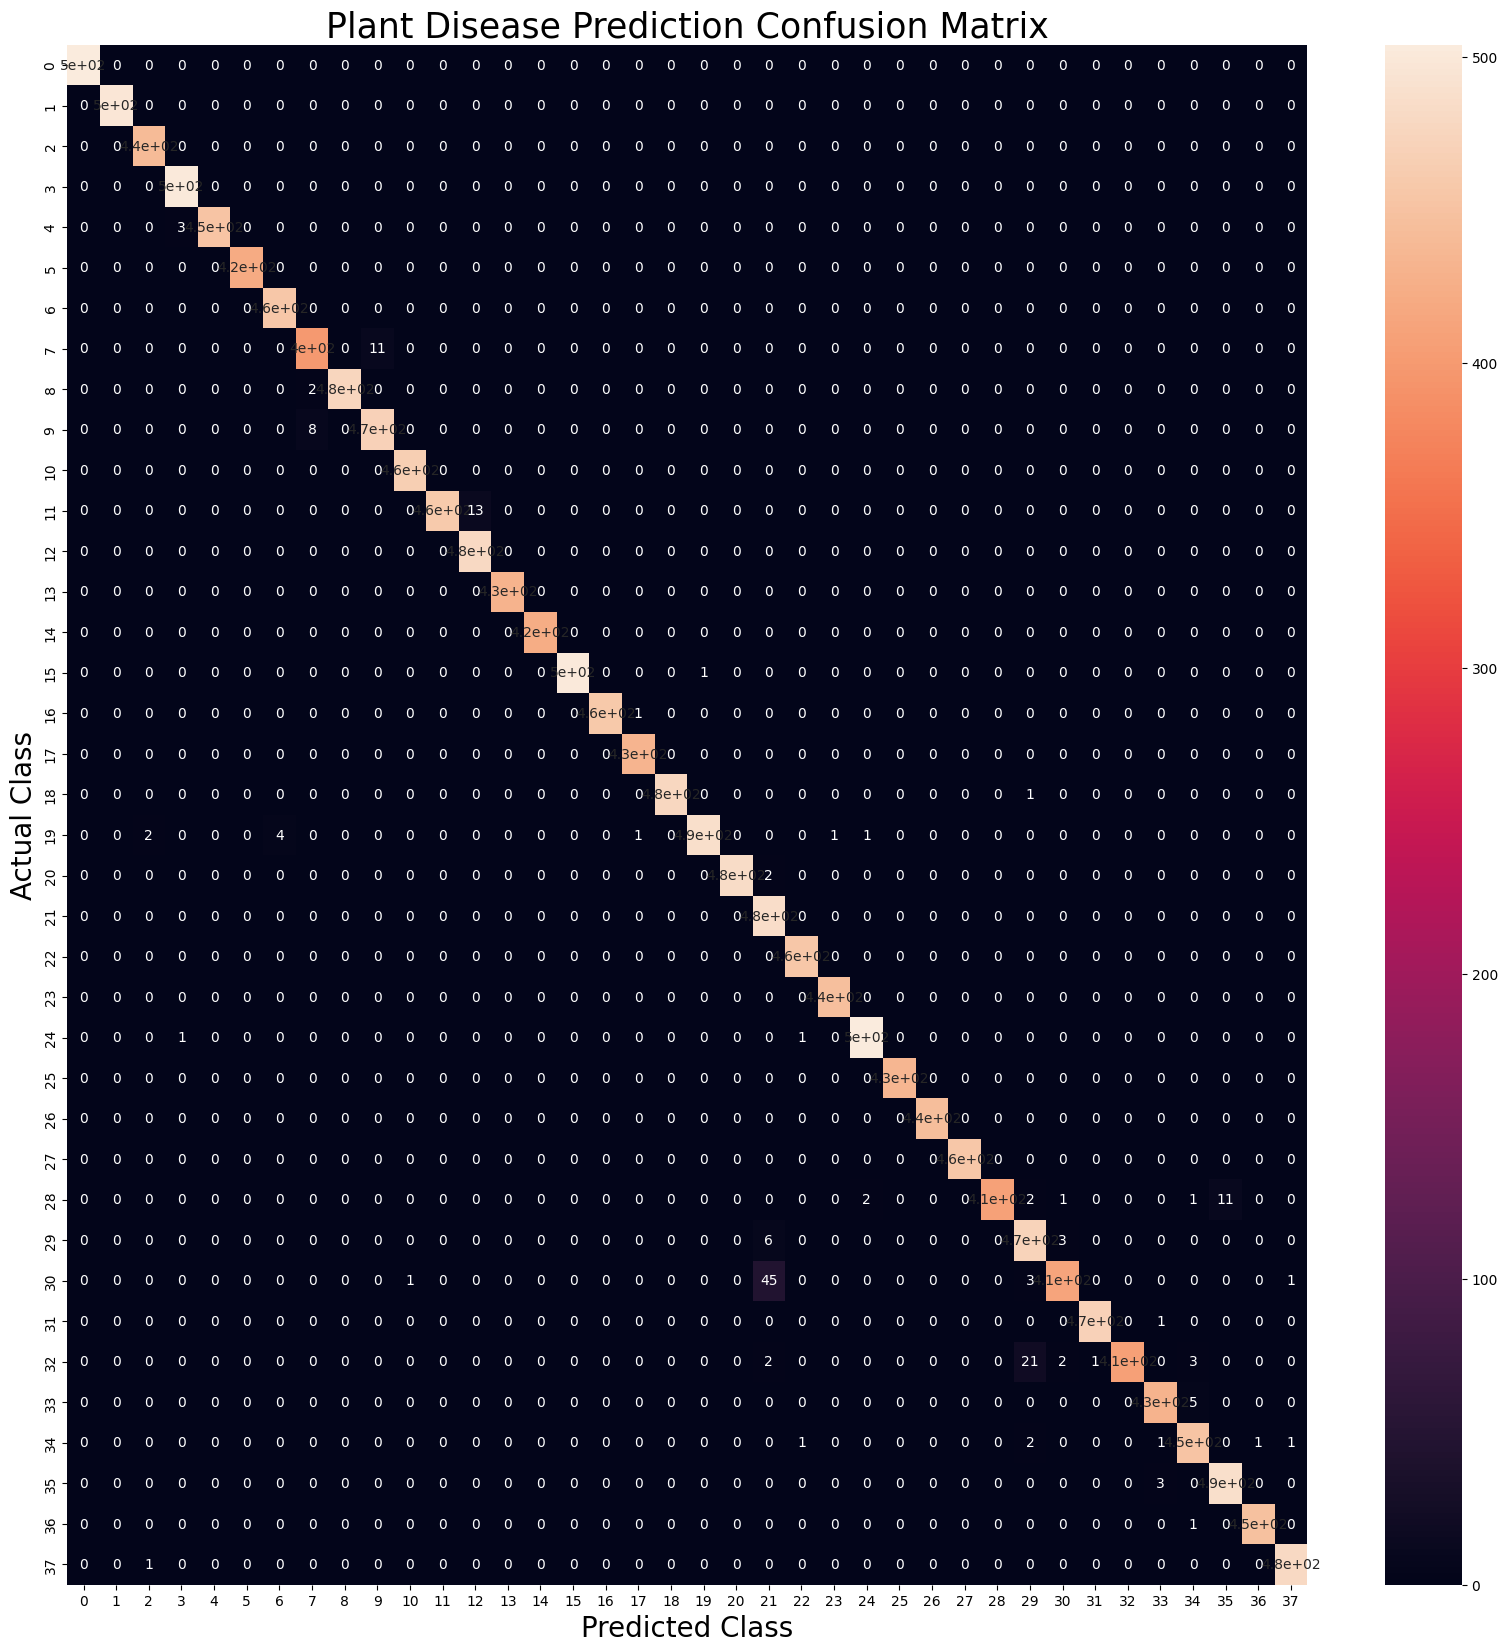

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [6]:
cnn = tf.keras.models.load_model('/content/plant_disease_classification_v3.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


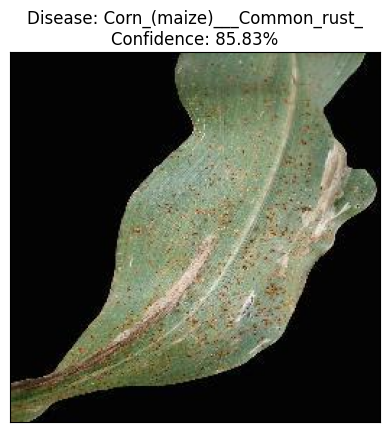

In [20]:
# Test Image Visualization
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

image_path = '/content/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG'

# Read image for display
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Load image for model
image = tf.keras.preprocessing.image.load_img(
    image_path,
    target_size=(128, 128)
)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # batch size = 1

# Predict
predictions = cnn.predict(input_arr)

# Get predicted class & confidence
result_index = np.argmax(predictions)
confidence = predictions[0][result_index] * 100  # percentage

model_prediction = class_names[result_index]

# Display result
plt.imshow(img)
plt.title(f"Disease: {model_prediction}\nConfidence: {confidence:.2f}%")
plt.xticks([])
plt.yticks([])
plt.show()
